Importing required libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Download the 'Telco Customer Churn' dataset from kaggle.com

In [2]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# inspect our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Through above info. command we noticed that TotalCharges should be a integer type
- It is of object type, because it contains blank values

In [5]:
# replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [6]:
# now, we replace the blank values (" "), with "0"

df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Checking null values in the data

In [8]:
# df.isnull().sum()   # checks null values column-wise

df.isnull().sum().sum()   # checks overall null values

np.int64(0)

In [9]:
# overall description of entire data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Check for duplicate values

In [12]:
# df.duplicated().sum()
# this checks entire dataset

df['customerID'].duplicated().sum()
# this check duplicate values based on specific column that has unique values containing in it

np.int64(0)

Converting 0 and 1 values of  'SeniorCitizen' column to Yes and No, to make it easier to understand

In [16]:
def conv(value):
  if value == 1:
    return 'Yes'
  else:
    return 'No'

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


[Text(0, 0, '5174'), Text(0, 0, '1869')]

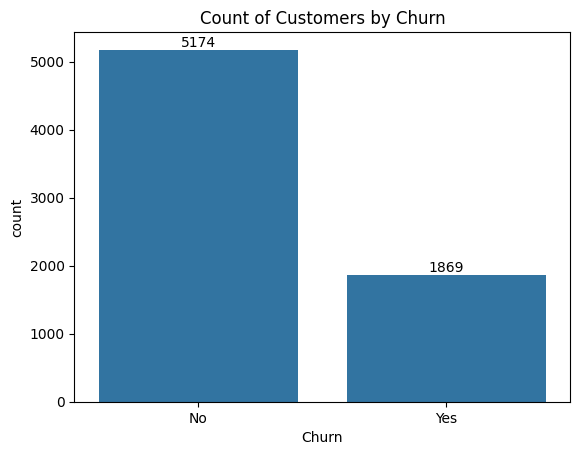

In [32]:
ax = sns.countplot(x = 'Churn', data = df)
plt.title("Count of Customers by Churn")
ax.bar_label(ax.containers[0])

([<matplotlib.patches.Wedge at 0x7ca6b068a350>,
 [Text(-0.7393678155529122, 0.8144539479458093, 'No'),
  Text(0.7393680809356543, -0.8144537070291521, 'Yes')],
 [Text(-0.40329153575613386, 0.4442476079704414, '73.46%'),
  Text(0.40329168051035685, -0.44424747656135566, '26.54%')])

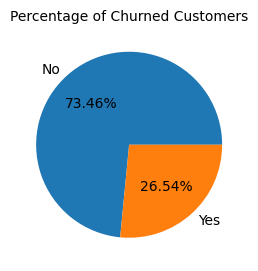

In [35]:
gb = df.groupby("Churn").agg({'Churn':'count'})
# here, we grouped our 'Churn' column with groupby function and also added 'agg' function for count.

plt.figure(figsize=(3,4))
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.pie(gb['Churn'], labels=gb.index, autopct='%1.2f%%')

**From the given pie chart we can conclude that 26.54% of our customers have churned out.**

Now let's explore the reason behind it!

# Checking based on Gender :

Text(0.5, 1.0, 'Churned by Gender')

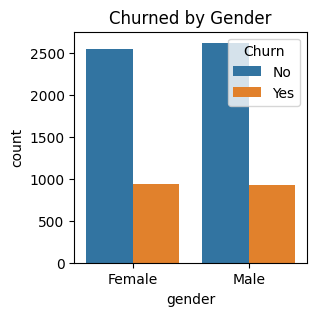

In [41]:
plt.figure(figsize=(3,3))
sns.countplot(x = 'gender', data = df, hue = 'Churn')
plt.title("Churned by Gender")

####**Gender does not have much impact on Churned data**

# Checking based on Senior Citizens :

Text(0.5, 1.0, 'Churned by Senior Citizens')

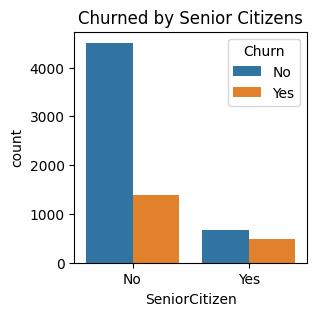

In [42]:
plt.figure(figsize=(3,3))
sns.countplot(x = 'SeniorCitizen', data = df, hue = 'Churn')
plt.title("Churned by Senior Citizens")

# i want to create a stack bar chart which gives me labels as % of total
# used this with chatgpt to get below stacked bar chart with %

Text(0.5, 1.0, 'Count of Customers by Senior Citizens')

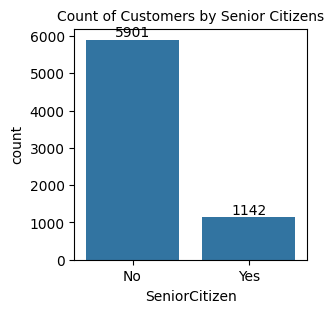

In [56]:
plt.figure(figsize=(3,3))
ax = sns.countplot(x = 'SeniorCitizen', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizens", fontsize = 10)

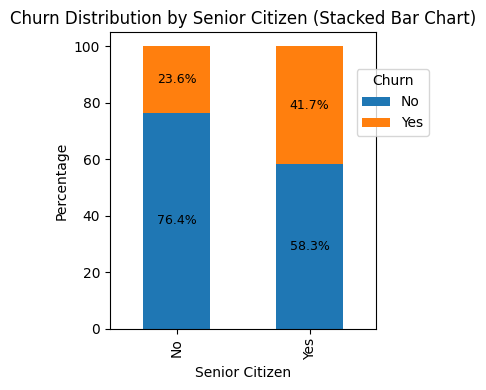

In [62]:
senior_churn = df.groupby(['SeniorCitizen', 'Churn']).size().unstack().fillna(0)
senior_churn_percent = senior_churn.div(senior_churn.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = senior_churn_percent.plot(kind='bar', stacked=True, figsize=(4,4))

# Add % labels on bars
for i, row in enumerate(senior_churn_percent.values):
    cum_height = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(i, cum_height + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=9)
        cum_height += val

# Formatting
plt.title('Churn Distribution by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

####**Comparatively a greater percentage of people in senior citizen category have churned.**

# Checking based on Tenure :

<Axes: xlabel='tenure', ylabel='Count'>

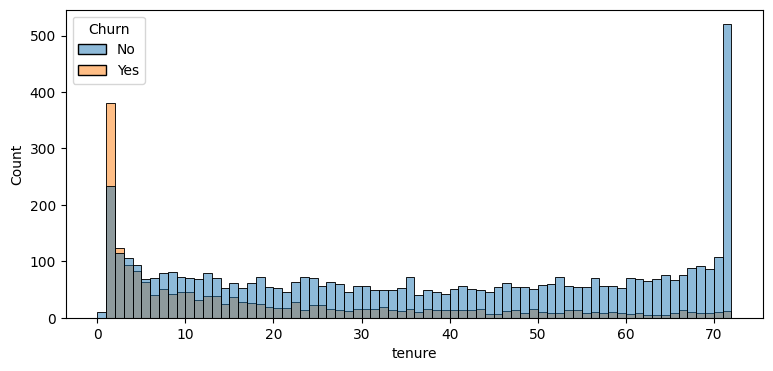

In [65]:
plt.figure(figsize=(9,4))
sns.histplot(x = 'tenure', data = df, hue = 'Churn', bins = 72)

#####**People who have used our services for a long time have stayed and people who have used our services for 1 or 2 months have churned.**

# Checking based on Contract :

Text(0.5, 1.0, 'Count of Customers by Contract')

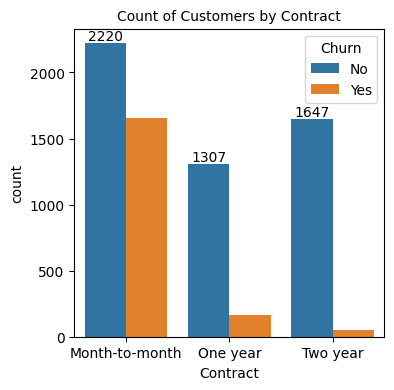

In [68]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = 'Contract', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract", fontsize = 10)

####**People who have month to month contract are likely to churn then from those who have 1 to 2 years of contract.**

# Checking based on Services :

In [73]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

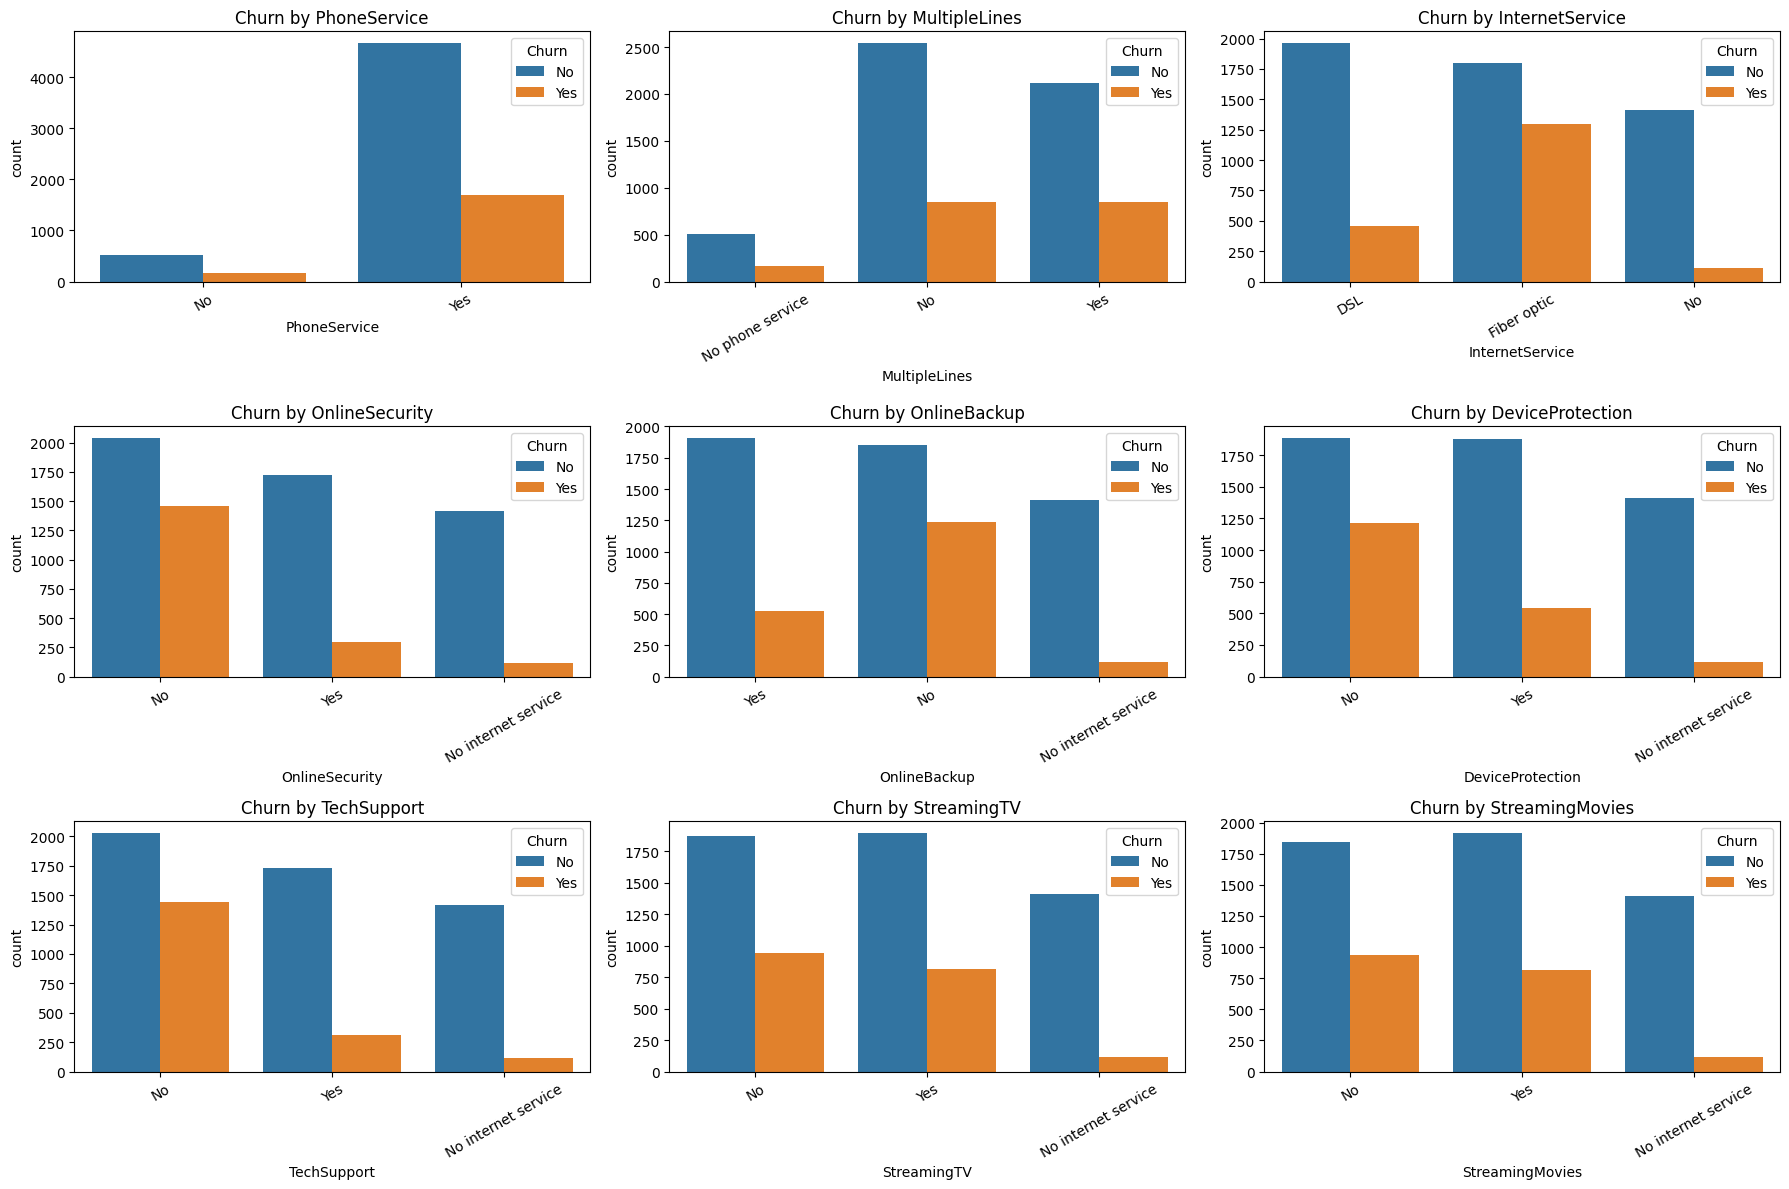

In [77]:
# Your categorical columns
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up the plot grid (3 rows x 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Flatten to easily iterate

# Create countplots for each column
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Churn by {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].legend(title='Churn')

# Remove any empty axes (if there were fewer than 9 plots)
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Customers without additional services (like OnlineSecurity, TechSupport, or DeviceProtection) tend to have higher churn rates.

- Those with fiber optic internet show notably higher churn compared to DSL or no internet.

- Services like PhoneService and MultipleLines don't show as strong a churn correlation.

- Across most services, lack of engagement (i.e., “No” or “No internet service”) correlates with higher churn, suggesting bundled services may improve retention.